# Que 02

Create a Simple Linear Regression model for a given dataset by using polynomial regression.

Datasets:
1. NewspaperData.csv
Independent = ‘Daily’, Dependent=’Sunday’

2. delivery_time.csv
Independent = ‘Sorting Time’, Dependent=’Delivery Time’

3. WC_AT.csv
Independent = ‘Waist’, Dependent=’AT’
Adipose Tissue (AT) and Waist Circumference(Waist)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('NewspaperData.csv')
df.head(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [5]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [6]:
df.corr()

/tmp/ipykernel_25687/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


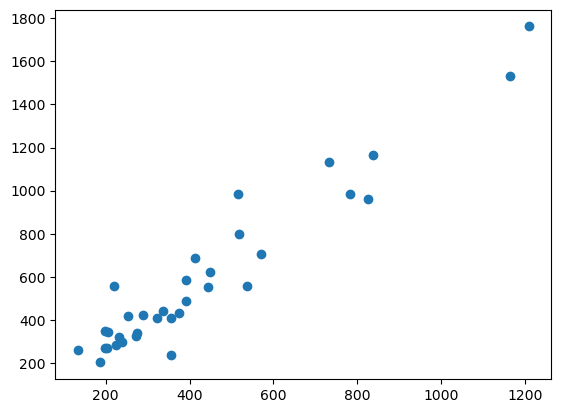

In [7]:
plt.scatter(df['daily'], df['sunday'])

In [8]:
x = df.drop(['Newspaper', 'sunday'], axis = 1)
y = df['sunday']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 12345)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
y_true = y_test
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
# r2_score compare with mean value
r2 = r2_score(y_true, y_pred)

print(f"mean absolute error: {mae:.2f}")
print(f"mean squared error: {mse:.2f}")
print(f"root mean squarred error: {rmse:.2f}")
print(f"r2 score = {r2:.2f}")


mean absolute error: 61.55
mean squared error: 5884.41
root mean squarred error: 76.71
r2 score = 0.93


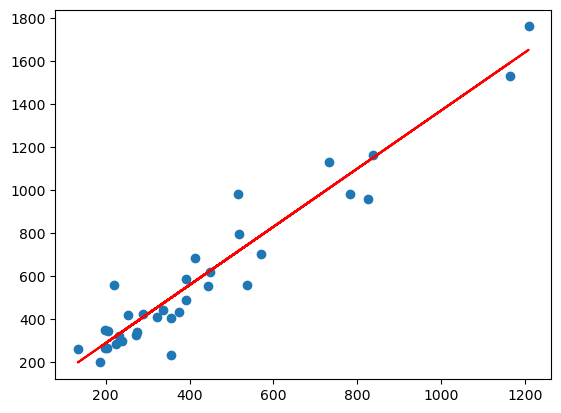

In [13]:
plt.scatter(x['daily'], y)
plt.plot(x['daily'], model.predict(x), color = "Red", label = "Regression Line")


In [14]:
df = pd.read_csv('delivery_time.csv')
df.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [16]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [17]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


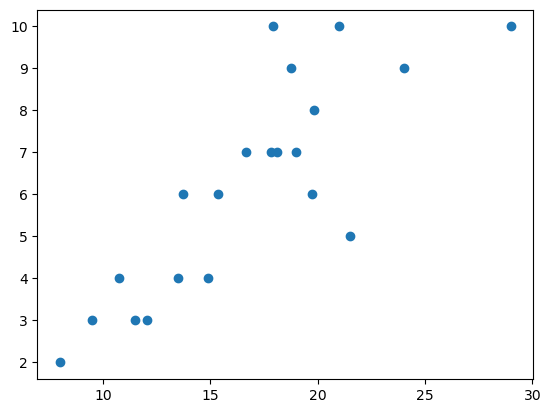

In [18]:
plt.scatter(df['Delivery Time'], df['Sorting Time'])

In [19]:
x = df.drop(['Delivery Time'], axis = 1)
y = df['Delivery Time']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 12345)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_true = y_test
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
# r2_score compare with mean value
r2 = r2_score(y_true, y_pred)

print(f"mean absolute error: {mae:.2f}")
print(f"mean squared error: {mse:.2f}")
print(f"root mean squarred error: {rmse:.2f}")
print(f"r2 score = {r2:.2f}")


mean absolute error: 2.83
mean squared error: 13.32
root mean squarred error: 3.65
r2 score = 0.12


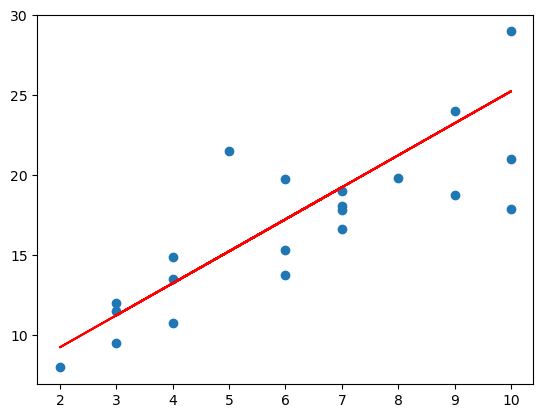

In [24]:
plt.scatter(x['Sorting Time'], y)
plt.plot(x['Sorting Time'], model.predict(x), color = "Red", label = "Regression Line")


In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
poly.fit(x)
x_new = poly.transform(x)


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_new, y)

LinearRegression()

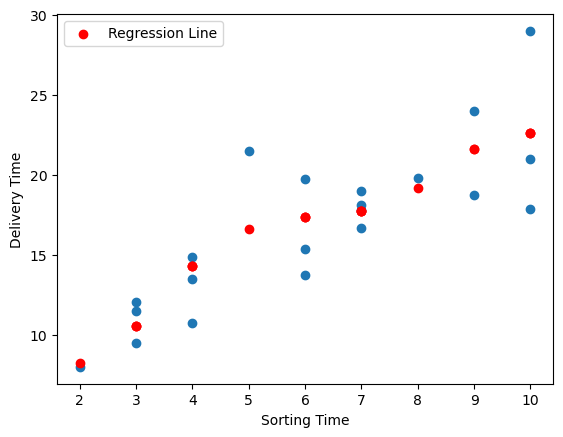

In [36]:
plt.scatter(x['Sorting Time'], y)
plt.scatter(x['Sorting Time'], model.predict(x_new), color="red", label="Regression Line")
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend()